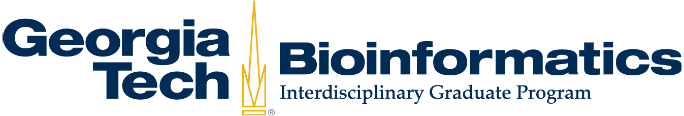

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 4 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 15th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 6*
### *Total Points: 5+5+10+10+20+30 = 80*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>You will find this in the announcement section of your group</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: <-----> and our population of interest is: <-----> </p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [2]:
#For this project, you will use VCF file from phase 3 1000Genomes.
!ls -lh /storage/ice-shared/biol6150/Data/1000GenomesAll/ | head

total 15G
-rw-r--r-- 1 ssharma454 gtperson 742M Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 736M Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 711M Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 534M Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson  91K Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 482M Aug  4  2021 phase3.chr14.GRCh38.GT.crossmap.vcf.gz


In [1]:
#Show the first 10 variant IDs from chromosome 15. You bash command goes here.
!bcftools view -H -r chr15 /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | cut -f 3 | head -n 11

rs371549847
rs565090028
rs201219124
rs373298708
rs560310552
rs552896638
rs542841371
rs561207761
rs531597354
rs61997842
rs74569576
cut: write error: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

In [1]:
#Get the samples present in the VCF file.
!bcftools query -l /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | wc -l

2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

In [3]:
#Your command for getting the number of variants here.
!bcftools query -f '%CHROM:%POS %ID %REF %ALT\n' /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | wc -l

3885458


<div class="alert alert-block alert-warning">
    <h3>1.5 Indexing VCF files</h3>
    <p><b>1.5.1</b> Do the VCF files have a matched tabix file in the shared directory?</p>
    <p><b>1.5.1</b> Using tabix, write the number of variants that lie between genomic positions 15,000,000-15,500,500 on chromosome 22?</p>
</div>

In [9]:
#Your answers here.

Yes,they have a matched tabix file.

In [4]:
!tabix -h /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr22.GRCh38.GT.crossmap.vcf.gz ch22: 15000000 - 15500500 | grep -v “^#” | wc -l

3532


<div class="alert alert-block alert-warning">
    <h3>1.6 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.6.1</b> Write the 1000 genomes population that come from the continental population of interest</p>
    <p><b>1.6.2</b> Extract the samples that come from this population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.6.3</b> How many samples are present in your final VCF file?</p>
</div>

In [11]:
#Write the 3 letter codes of the populations of interest.

Superpoplation code:
EAS - East Asian population code
 - Code:
CHS
KHV
JPT
CHB
CDX


In [ ]:
#Write the commands used for extraction

In [16]:
!awk 'NR>1 && ($4 == "CHB" || $4 == "JPT" || $4 == "CHS" || $4 == "CDX" || $4 == "KHV") {print $1}' ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/igsr_samples.tsv > east_asian.tsv

In [6]:
!mkdir filter_vcf
for chr in range(1,22):
    output_file = f"~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr{chr}_filter.vcf.gz"
    !bcftools view -S ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/east_asian.tsv --force-samples -O z -o {output_file} ~/biol6150/Data/1000GenomesAll/phase3.chr{chr}.GRCh38.GT.crossmap.vcf.gz --threads 64

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00615"... skipping
Warn: subset called for sample that does not exist in header: "HG00627"... skipping
Warn: subset called for sample that does not exist in header: "HG02388"... skipping
Warn: subset called for sample that does not exist in header: "HG02015"... skipping
Warn: subset called for sample that does not exist in header: "HG02027"... skipping
Warn: subset called for sample that does not exist in header: "HG02173"... skipping
Warn: subset called for sample that does not exist in header: "HG02046"... skipping
Warn: subset called for sample that does not exist in header: "HG02135"... skipping
Warn: subset called for sample that does not exist in header: "HG02077"... skipping
Warn: subset called for sample that does not exist in header: "NA18795"... skipping
Warn: subset called for sample that does not exist in header: "HG02363"... skipping
Warn: subset called for sample that does not exist in header: "HG02387"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

Warn: subset called for sample that does not exist in header: "HG00411"... skipping
Warn: subset called for sample that does not exist in header: "HG00423"... skipping
Warn: subset called for sample that does not exist in header: "HG00447"... skipping
Warn: subset called for sample that does not exist in header: "HG00459"... skipping
Warn: subset called for sample that does not exist in header: "HG00408"... skipping
Warn: subset called for sample that does not exist in header: "HG00427"... skipping
Warn: subset called for sample that does not exist in header: "HG00453"... skipping
Warn: subset called for sample that does not exist in header: "HG00465"... skipping
Warn: subset called for sample that does not exist in header: "HG00480"... skipping
Warn: subset called for sample that does not exist in header: "HG00512"... skipping
Warn: subset called for sample that does not exist in header: "HG00567"... skipping
Warn: subset called for sample that does not exist in header: "HG00579"... s

In [8]:
!bcftools concat -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr{1..21}_filter.vcf.gz

Checking the headers and starting positions of 21 files
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr1_filter.vcf.gz	106.134086 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr2_filter.vcf.gz	114.640207 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr3_filter.vcf.gz	96.299366 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr4_filter.vcf.gz	96.335826 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr5_filter.vcf.gz	86.259017 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr6_filter.vcf.gz	86.593352 seconds
Concatenating /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/filter_vcf/chr7_filter.vcf.gz	78.79644

In [14]:
#Indexing the combined files
!bcftools index ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz

In [13]:
#Extract the total number of samples present in your final VCF file.
!bcftools query -l ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz | wc -l

504


# **2. Annotating variants**
### *Total Questions: 2*
### *Total Points: 20+20+60 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Find clinically important genes</h3>
    <p>Different genes perform different functions in our body. Is there a way we can find clincically important genes for humans? Search on web and find a resource that can tell you which genes are clinically important (there can be multiple answers)</p>
</div>

In [14]:
#What was the resource that you identified? Give a 1-3 line description and the web link.

https://www.genecards.org/
We utilize Gene Cards to identify genes associated with the East Asian population. This resource provides comprehensive details about each gene, including a summary of its characteristics and the number of related publications.

<div class="alert alert-block alert-warning">
    <h3>2.2 Varints in those genes</h3>
    <p><b>2.2.1</b> For your population, can you identify a set of genes (3-8 genes; not a lot) that might be clinically relevant? If not, then try finding clincially important genes for all humans and use them.</p>
    <p><b>2.2.2</b> In any one of the genes identified above, can you find a variant (dbSNP ID) which has a HIGH or MODERATE variant effect consequence? <i>Hint:</i> https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html</p>
</div>

In [15]:
#You answers here.

2.2.1
ROS1 - it is also associated with Gastric Cancer, Glioblastoma Multiforme.
TP53 - it is also associated with Li-Fraumeni Syndrome (LFS), Ovarian Cancer.
STK11 - it is also associated with Peutz-Jeghers Syndrome (PJS).
BRAF - it is also associated with NSCLC.

2.2.2
TP53(rs2072830707) is a frameshift_variant which has HIGH variant effect consequence.

<div class="alert alert-block alert-warning">
    <h3>2.3 Select a gene</h3>
    <p><b>2.3.1 </b>Select a clinically relevant gene from the list in <i>2.2.1</i> and create a new VCF file which:</p> 
    <p>1. Has all the samples from your continental population of interest</p>
    <p>2. Has only the variants which exist on the gene of interest</p>
    <p><b>Note:</b> If you end up with no variants, then try another gene. It is important that you find some variants before you move forward.
        <hr>
    <p><b>2.3.2 </b>How many individuals in the VCF file (subset of your continental population) carry a variant with a HIGH or MODERATE consequence (let's use ensembl consequence definitions for this question; as used above). Print their 1000 genomes ID.</p>
</div>

2.3.1
By using (http://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000047936;r=6:117287353-117425942), and the locus of the ROS1 gene is at Chromosome 6: 117,287,353-117,425,942

In [7]:
#Show your commands and results here. Add more cells as required.
!bcftools view -r chr6:117287353-117425942 -Ov -o  ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.vcf  ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz


In [8]:
!cat ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.vcf | grep -v "^#" | head

chr6	117287362	rs187385694	T	C	100	PASS	AC=0;AF=0.00339457;AN=1008;NS=2504;DP=15036;EAS_AF=0;AMR_AF=0.0014;AFR_AF=0.0121;EUR_AF=0;SAS_AF=0;AA=T|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0

In [9]:
!snpEff ann GRCh38.105 ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.vcf > ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.Annote.vcf

In [10]:
!grep -v '^#' Chr6.ROS1.Annote.vcf | head -n 10

chr6	117287362	rs187385694	T	C	100.0	PASS	AC=0;AF=0.00339457;AN=1008;NS=2504;DP=15036;EAS_AF=0;AMR_AF=0.0014;AFR_AF=0.0121;EUR_AF=0;SAS_AF=0;AA=T|||;VT=SNP;ANN=C|3_prime_UTR_variant|MODIFIER|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|44/44|c.*1130A>G|||||1130|,C|downstream_gene_variant|MODIFIER|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding||c.*1130A>G|||||938|	GT	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0

In [12]:
#2.3.2 
#How many individuals in the VCF file (subset of your continental population) carry a variant with a HIGH or MODERATE consequence (let's use ensembl consequence definitions for this question; as used above). Print their 1000 genomes ID.
!cp ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.Annote.vcf ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.Annote.copyfile.vcf

#file compression.
!gzip ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.Annote.copyfile.vcf

In [13]:
#Now we are extracts and filters for high and moderate impact variant annotations from a compressed VCF file using bcftools and grep.

!bcftools query -f '%INFO/ANN\n' ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.Annote.copyfile.vcf.gz| grep -E 'HIGH|MODERATE'

C|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding|43/43|c.6985C>G|p.Pro2329Ala|7184/7435|6985/7044|2329/2347||,C|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|44/44|c.6967C>G|p.Pro2323Ala|7253/8451|6967/7026|2323/2341||
C|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding|43/43|c.6983A>G|p.Lys2328Arg|7182/7435|6983/7044|2328/2347||,C|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|44/44|c.6965A>G|p.Lys2322Arg|7251/8451|6965/7026|2322/2341||
T|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding|43/43|c.6964G>A|p.Ala2322Thr|7163/7435|6964/7044|2322/2347||,T|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|44/44|c.6946G>A|p.Ala2316Thr|7232/8451|6946/7026|2316/2341||
G|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.

G|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding|17/43|c.2539T>C|p.Trp847Arg|2738/7435|2539/7044|847/2347||,G|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|18/44|c.2524T>C|p.Trp842Arg|2810/8451|2524/7026|842/2341||,G|intron_variant|MODIFIER|ENSG00000282218|ENSG00000282218|transcript|ENST00000467125.1|protein_coding|4/6|c.548-57723T>C||||||WARNING_TRANSCRIPT_NO_START_CODON
T|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368508.7|protein_coding|16/43|c.2411C>A|p.Thr804Asn|2610/7435|2411/7044|804/2347||,T|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368507.8|protein_coding|17/44|c.2396C>A|p.Thr799Asn|2682/8451|2396/7026|799/2341||,T|intron_variant|MODIFIER|ENSG00000282218|ENSG00000282218|transcript|ENST00000467125.1|protein_coding|4/6|c.548-62008C>A||||||WARNING_TRANSCRIPT_NO_START_CODON
G|missense_variant|MODERATE|ROS1|ENSG00000047936|transcript|ENST00000368

# **3. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>3.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>3.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>3.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>

In [ ]:
#All answers go here. 1-3 lines in general for each.

#3.1.1 
We have taken PGS000070 sample set because the tested sample is from  East Asian population (Chinese ancestry individuals). The dataset includes the information about the lung adenocarcinoma which provides us the insight on lung cancer of East Asian Populations.



3.1.2
Here is the PGS weblink: https://www.pgscatalog.org/score/PGS000070/
Here is the PGS weblink: https://www.pgscatalog.org/publication/PGP000049/

3.1.3 
Test size: 54,475 individuals (100%)
For training purpose they have used: 
European: 51.1%, East Asian: 48.9% 

# **4. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 30+40+30 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [1]:
#Put all the code and comments here.
!plink2 --vcf ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz --make-pgen --out ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine_Plink2

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine_Plink2.log.
Options in effect:
  --make-pgen
  --out /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine_Plink2
  --vcf /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine.vcf.gz

Start time: Thu Nov 16 20:55:21 2023
191896 MiB RAM detected, ~185452 available; reserving 95948 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
--vcf: 80464452 variants scanned.
--vcf: 80411k variants converted.
/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine_Plink2-temporary.pgen
+
/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project4/combine_Plink2-temporary.pvar.zst
+
/home/hice1/hpatil39/biol6150/ProjectSubmissions/Gr

In [36]:
!wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000070/ScoringFiles/PGS000070.txt.gz 

--2023-11-18 00:32:32--  https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000070/ScoringFiles/PGS000070.txt.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914 [application/x-gzip]
Saving to: ‘PGS000070.txt.gz.1’

PGS000070.txt.gz.1  100%[===================>]     914  --.-KB/s    in 0s      

2023-11-18 00:32:32 (432 MB/s) - ‘PGS000070.txt.gz.1’ saved [914/914]



In [38]:
!wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000070/ScoringFiles/PGS000070.txt.gz

--2023-11-18 00:34:37--  https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000070/ScoringFiles/PGS000070.txt.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 914 [application/x-gzip]
Saving to: ‘PGS000070.txt.gz.2’

PGS000070.txt.gz.2  100%[===================>]     914  --.-KB/s    in 0s      

2023-11-18 00:34:38 (676 MB/s) - ‘PGS000070.txt.gz.2’ saved [914/914]



In [35]:
!zcat ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/PGS000070.txt.gz  | grep "variants_number" 

#variants_number=19


In [27]:
!zcat PGS000070.txt.gz | grep -v "#" | awk 'NR>1 {print $1}' > PGS000070.txt


In [28]:
!head PGS000070.txt

rs17038564
rs2293607
rs11375254
rs13167280
rs401681
rs2517873
rs3817963
rs1853837
rs5879422
rs4236709


In [33]:
!bcftools view -i 'ID=@PGS000070.txt' combine.vcf.gz -o combine.overlap.vcf.gz

In [34]:
#Show that the variant IDs are also overlapping.
!bcftools query -l combine.overlap.vcf.gz | wc -l

504


Total variants : 19

<div class="alert alert-block alert-warning">
    <h3>4.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
</div>

In [5]:
###All the work here.
!bcftools query -f'[%SAMPLE\t%ID\t%REF\t%ALT\t%GT\n]' ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/Chr6.ROS1.vcf > ~/biol6150/ProjectSubmissions/Group14-Peaches/Project4/prs.vcf

In [117]:
!zcat PGS000070.txt.gz > PGS000070_new.txt

In [118]:
!head PGS000070_new.txt

###PGS CATALOG SCORING FILE - see https://www.pgscatalog.org/downloads/#dl_ftp_scoring for additional information
#format_version=2.0
##POLYGENIC SCORE (PGS) INFORMATION
#pgs_id=PGS000070
#pgs_name=PRS_LC_C
#trait_reported=Lung cancer
#trait_mapped=lung adenocarcinoma
#trait_efo=EFO_0000571
#weight_type=ln(OR)
#genome_build=GRCh37


In [139]:
!grep -v "#" PGS000070_new.txt | awk 'NR>1 {print $1"\t"$4"\t"$6}' > PGS000070.txt

In [140]:
!head PGS000070.txt

rs17038564	G	0.102
rs2293607	T	0.117
rs11375254	T	0.19
rs13167280	A	0.265
rs401681	C	0.145
rs2517873	A	0.183
rs3817963	C	0.061
rs1853837	A	0.14
rs5879422	T	0.084
rs4236709	G	0.156


In [141]:
!plink2 --pfile combine_Plink2 --score PGS000070.txt 1 2 3 --out PGS_output

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PGS_output.log.
Options in effect:
  --out PGS_output
  --pfile combine_Plink2
  --score PGS000070.txt 1 2 3

Start time: Fri Nov 17 23:18:56 2023
515738 MiB RAM detected, ~503451 available; reserving 257869 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
combine_Plink2.psam.
80464452 variants loaded from combine_Plink2.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.
--score: 19 variants processed.
--score: Results written to PGS_output.sscore .
End time: Fri Nov 17 23:19:07 2023


In [1]:
!head PGS_output.sscore

#IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	SCORE1_AVG
HG00404	38	15	0.0464474
HG00409	38	22	0.0665263
HG00428	38	15	0.0467368
HG00442	38	22	0.0642105
HG00403	38	22	0.0675789
HG00473	38	15	0.0430526
HG00410	38	15	0.0458947
HG00422	38	14	0.0390263
HG00446	38	23	0.0706316


<div class="alert alert-block alert-warning">
    <h3>4.3 Visualize the scores by populations in the continental populations of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

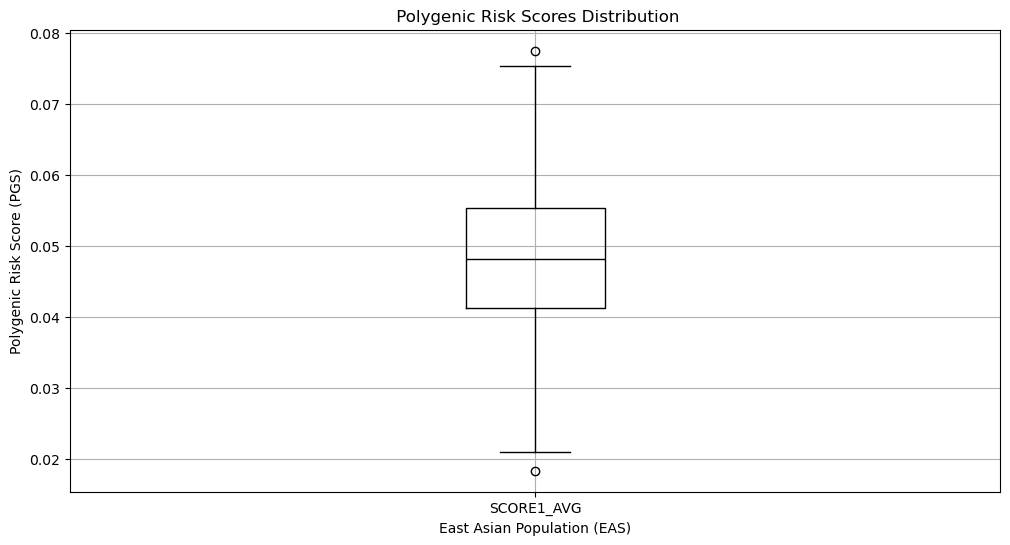

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('PGS_output.sscore', sep='\s+')

boxplot_color = dict(color='black')
plt.figure(figsize=(12, 6))
df.boxplot(column='SCORE1_AVG', **boxplot_color)
plt.title(' Polygenic Risk Scores Distribution')
plt.ylabel('Polygenic Risk Score (PGS)')
plt.xlabel('East Asian Population (EAS)')
plt.show()
